#**Predicting Breast Cancer in a patient**

##**Dataset Information:**

The dataset consists of several predictor variables and one target variable, Diagnosis.

The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect 

##**Scope:**

---


● Analysing the available data and exploring relationships among given variables

● Data Pre-processing

● Training SVM classifier to predict whether the patient has cancer or not

● Assess the correctness in classifying data with respect to efficiency and 
effectiveness of the SVM classifier in terms of accuracy, precision, sensitivity, specificity and AUC ROC

● Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library


#Importing all required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

###Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Mini-Projects/main/cancer.csv', index_col=False)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In here, The unnamed: 32 column has a large amount of null values. So we should drop the column.

In [4]:
df = df.drop('Unnamed: 32', axis=1)

After removed the column. Check the shape of the DataFrame.

In [5]:
df.shape

(569, 32)

In [6]:
df = df.drop_duplicates()

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

First thing to do is to enumerate the diagnosis column such that M = 1, B = 0. 

Then, I set the ID column to be the index of the dataframe. Afterall, the ID column will not be used for machine learning

In [8]:
df['diagnosis'] = df['diagnosis'].apply(lambda x:'1' if x == 'M' else '0')
df = df.set_index('id')

Let's take a look at the number of Benign and Maglinant cases from the dataset. 

From the output shown below, majority of the cases are benign (0).

In [9]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


Next, we visualise the data using density plots to get a sense of the data distribution.

From the outputs below, you can see the data shows a general gaussian distribution.

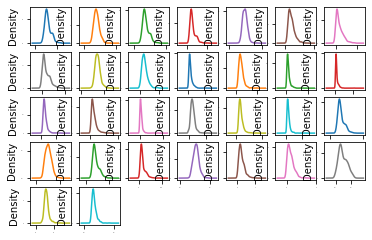

In [10]:
df.plot(kind='density', subplots=True, layout=(5,7),sharex=False,legend=False, fontsize=1)
plt.show()

It is good to check the correlations between the attributes.

From the output graph below, The red around the diagonal suggests that attributes are correlated with each other.

The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations.

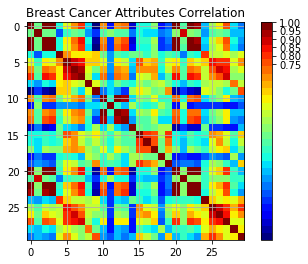

In [12]:
from matplotlib import cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation='none', cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
#Add colorbar, make sure to specify the tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.9,.95,1])
plt.show()

Finally, we'll split the data into predictor variables and target variable, following by breaking them into train and test sets.

We will use 20% of the data as test set.

In [13]:
X = df.drop('diagnosis', axis=1).values
y=df['diagnosis'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Baseline Algorithm Checking

---

From the dataset, we will analysis and build a model to predict if a given set of symptoms lead to breast cancer.

This is a binary classification problem, and a few algorithms are appropriate for use.

Since we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform.

We will use 10 fold cross validation for each testing.

---



The following non-linear algorithms will be used, namely:

**Classification and Regression Trees (CART)**

**Linear Support Vector Machines (SVM)**

**Gaussian Naive Bayes (NB)**

**k-Nearest Neighbors (KNN).**

In [38]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('GAUSSIAN NAIVE BAYES', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [39]:
num_folds = 10
results = []
names =[]
for name, model in models_list:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  start = time.time()
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
  end = time.time()
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f) (runtime: %f)" % (name, cv_results.mean(), cv_results.std(),end-start))

CART: 0.923382 (0.038831) (runtime: 0.095583)
SVM: 0.903430 (0.032271) (runtime: 0.067172)
GAUSSIAN NAIVE BAYES: 0.943043 (0.025914) (runtime: 0.035151)
KNN: 0.923430 (0.047771) (runtime: 0.064714)


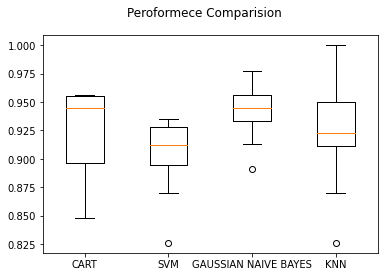

In [40]:
fig = plt.figure()
fig.suptitle('Peroformece Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like GaussianNB, KNN and CART performed the best given the dataset (all above 92% mean accuracy).

Support Vector Machine has a surprisingly bad performance here.

However, if we standardise the input dataset, it's performance should improve.

##Evaluation of algorithm on Standardised Data

---


The performance of the few machine learning algorithm could be improved if a standardised dataset is being used.

The improvement is likely for all the models.

I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness.

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [43]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.931836 (0.038839) (run time: 0.110449)
ScaledSVM: 0.971449 (0.022053) (run time: 0.087214)
ScaledNB: 0.944928 (0.034819) (run time: 0.037156)
ScaledKNN: 0.964928 (0.022383) (run time: 0.076584)


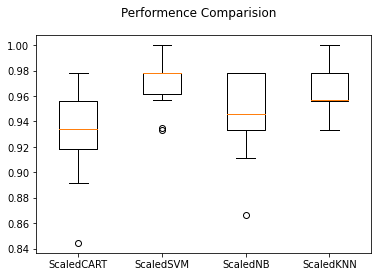

In [44]:
fig = plt.figure()
fig.suptitle('Performence Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Notice the drastic improvement of SVM after using scaled data.

Next, we'll fine tune the performance of SVM by tuning the algorithm

##Algorithm Tuning - Tuning SVM

---


We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel.

The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF).

We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [46]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980290 using {'C': 1.3, 'kernel': 'rbf'}
0.980242 (0.022995) with: {'C': 0.1, 'kernel': 'linear'}
0.835507 (0.049004) with: {'C': 0.1, 'kernel': 'poly'}
0.942899 (0.026370) with: {'C': 0.1, 'kernel': 'rbf'}
0.949469 (0.029674) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.973720 (0.016348) with: {'C': 0.3, 'kernel': 'linear'}
0.874879 (0.030452) with: {'C': 0.3, 'kernel': 'poly'}
0.956039 (0.019667) with: {'C': 0.3, 'kernel': 'rbf'}
0.966908 (0.028417) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.969324 (0.017516) with: {'C': 0.5, 'kernel': 'linear'}
0.890242 (0.038852) with: {'C': 0.5, 'kernel': 'poly'}
0.969324 (0.020033) with: {'C': 0.5, 'kernel': 'rbf'}
0.962512 (0.029836) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.964976 (0.019981) with: {'C': 0.7, 'kernel': 'linear'}
0.892464 (0.041778) with: {'C': 0.7, 'kernel': 'poly'}
0.973720 (0.021361) with: {'C': 0.7, 'kernel': 'rbf'}
0.962464 (0.034423) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.964928 (0.017420) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=1.3, with the accuracy of 98%.

###Application of SVC on dataset

Let's fit the SVM to the dataset and see how it performs given the test data.

In [47]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.008007


In [48]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [49]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [51]:
print(confusion_matrix(y_test, predictions))

[[66  1]
 [ 1 46]]


We can see that we achieve an accuracy of 99.1% on the held-out test dataset. 

From the confusion matrix, there is only 1 case of mis-classification.

The performance of this algorithm is expected to be high given the symptoms for breast cancer should exchibit certain clear patterns.

#**What else could be done**

---


--> 1) Test the algorithm on KNN and GausianNB

--> 2) Test the data with Artificial Neural Net